In [1]:
## Multiclass Random Forest Classification on the Principal Components of EEG data  
## Cross Validation split of train and test sets 

import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eeg = pd.read_csv('EEG_data_1.csv')

In [3]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [4]:
Y = list(eeg.pop('y'))

In [5]:
X = eeg.values

In [6]:
pca = PCA(n_components=50)

In [7]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
var= pca.explained_variance_ratio_

In [9]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

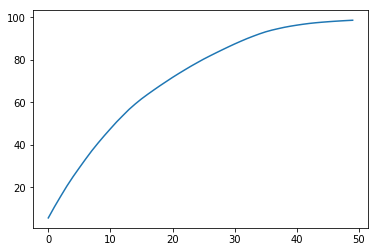

In [10]:
plt.plot(var)

In [11]:
x = pca.fit_transform(X)

In [12]:
x.shape

(11500, 50)

In [15]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [16]:
# Cross Validation train test split of PC 
test_size = 0.33
x_train, x_test, Y_train, Y_test = cross_validation.train_test_split(x, Y, test_size=test_size, random_state=0)

In [59]:
len(x_test)

3795

In [18]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Instantiating Random Forest model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)

In [20]:
# Training by Random Forest on training data
rf.fit(x_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [21]:
# Predictions
predict = rf.predict(x_test)

In [65]:
predict

array([ 3.485,  2.243,  2.625, ...,  4.429,  3.314,  2.788])

In [66]:
predict.shape

(3795,)

In [68]:
y_test = np.asarray(Y_test)

In [72]:
y_test

array([2, 1, 3, ..., 5, 3, 2], dtype=int64)

In [73]:
errors = abs(predict - y_test)

In [74]:
# Mean Absolute Error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.58 degrees.


In [75]:
# Random Forest Accuracy with all 5 classes
mape = 100 * (errors/Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.69 %.


In [76]:
# Random Forest Visualization
from sklearn.tree import export_graphviz
import pydot

In [77]:
# Pulling out a tree from the forest
tree = rf.estimators_[11]

In [94]:
# Exporting the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)

In [79]:
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [89]:
(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('a.png')